Boston housing dataset has 489 data points with 4 variables each.

Statistics for Boston housing datasets: 

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price: $438,900.00
Standard deviation of prices: $165,171.13

Average number of room: 6.0
Average price of house with 6.0 rooms or less: 358830.0
Average price of house with more than 6.0 rooms: 505704.0
The hypothesis is, if the house has more rooms, the house will be more expensive

Average percent of lower class worker: 13.0
Average price of house with 13.0 or less percentage of lower class worker: 546167.0
Average price of house with more than 13.0 percentage of lower class worker: 334366.0
The hypothesis is, if the house has lower percentage of lower class worker, the house will be more expensive

Average ratio student to teacher: 19.0
Average price of house with ratio student to teacher is 19.0 or less: 544065.0
Average price of house with ratio student to teacher is more than 19.0: 3664

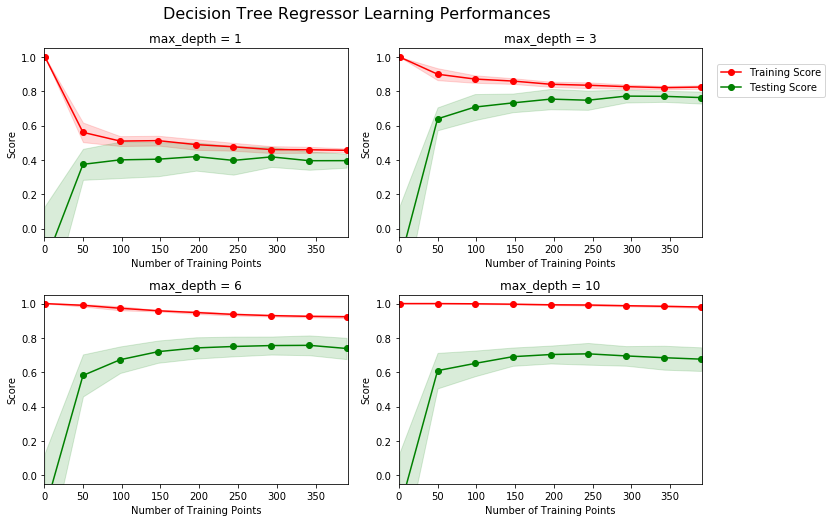

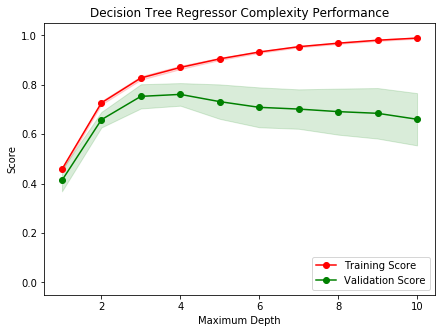

Parameter max_depth is 4 for the optimal model

Predicted selling price for client 1 home: $403,025.00
Predicted selling price for client 2 home: $237,478.72
Predicted selling price for client 3 home: $931,636.36


In [21]:
#Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
data_points, len_features = data.shape
   
# Success
print("Boston housing dataset has {} data points with {} variables each.\n".format(data_points, len_features))

################

#TODO: Minimum price of the data
minimum_price = min(prices)
#TODO: Maximum price of the data
maximum_price = max(prices)
#TODO: Mean price of the data
mean_price = np.mean(prices)
#TODO: Median price of the data
median_price = np.median(prices)
#TODO: Standard deviation of the data
std_price = np.std(prices)

#print
print('Statistics for Boston housing datasets: \n')
print('Minimum price: ${:,.2f}'.format(minimum_price))
print('Maximum price: ${:,.2f}'.format(maximum_price))
print('Mean price: ${:,.2f}'.format(mean_price))
print('Median price: ${:,.2f}'.format(median_price))
print('Standard deviation of prices: ${:,.2f}\n'.format(std_price))

################

################
#QUESTION 1 - FEATURE OBSERVATION

#get the mean of RM
mean_RM = round(np.mean(features['RM']))
print('Average number of room: {}'.format(mean_RM))
#now we got most house has average room is 6
#we could take mean of price with room <= 6
#and compared it with room >6
RM_less_6 = features['RM'] <= 6
mean_RM_less_6 = round(np.mean(prices[RM_less_6]))
print('Average price of house with {} rooms or less: {}'.format(mean_RM, mean_RM_less_6))
#now we compare it to the rest of the data
RM_more_6 = features['RM'] > 6
mean_RM_more_6 = round(np.mean(prices[RM_more_6]))
print('Average price of house with more than {} rooms: {}'.format(mean_RM, mean_RM_more_6))
print('The hypothesis is, if the house has more rooms, the house will be more expensive\n'.format(mean_RM))

#get the mean of LSTAT
mean_LSTAT = round(np.mean(features['LSTAT']))
print('Average percent of lower class worker: {}'.format(mean_LSTAT))
#we need to compare the price of house between LSTAT <=13 and LSTAT >13
LSTAT_less_13 = features['LSTAT'] <= 13
mean_LSTAT_less_13 = round(np.mean(prices[LSTAT_less_13]))
print('Average price of house with {} or less percentage of lower class worker: {}'.format(mean_LSTAT, mean_LSTAT_less_13))
#now we compare it to the rest of the data
LSTAT_more_13 = features['LSTAT'] > 13
mean_LSTAT_more_13 = round(np.mean(prices[LSTAT_more_13]))
print('Average price of house with more than {} percentage of lower class worker: {}'.format(mean_LSTAT, mean_LSTAT_more_13))
print('The hypothesis is, if the house has lower percentage of lower class worker, the house will be more expensive\n'.\
     format(mean_LSTAT))

#get the mean of PTRATIO
mean_PTRATIO = round(np.mean(features['PTRATIO']))
print('Average ratio student to teacher: {}'.format(mean_PTRATIO))
#we need to compare the price of house between PTRATIO <= 19 and PTRATIO > 19
PTRATIO_less_19 = features['PTRATIO'] <= 19
mean_PTRATIO_less_19 = round(np.mean(prices[PTRATIO_less_19]))
print('Average price of house with ratio student to teacher is {} or less: {}'.format(mean_PTRATIO, mean_PTRATIO_less_19))
#compare to the rest of the data
PTRATIO_more_19 = features['PTRATIO'] > 19
mean_PTRATIO_more_19 = round(np.mean(prices[PTRATIO_more_19]))
print('Average price of house with ratio student to teacher is more than {}: {}'.format(mean_PTRATIO, mean_PTRATIO_more_19))
print('The hypothesis is, if the house has lower student to teacher ratio, the house will be more expensive\n')

#################

#################

# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    score = r2_score(y_true, y_predict)
    
    return score

#calculate the perfomance of this model
score = performance_metric([3.0, -0.5, 2.0, 7.0, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print('Model has a coefficient of determination, R^2, of {:,.3f}\n'.format(score))

##################

##################

#TODO: Import 'train_test_split'
from sklearn import cross_validation
#TODO: Shuffle and split the data into training and testing datasets
X_train, X_test, y_train, y_test = cross_validation.train_test_split(features, prices, train_size = 0.8, random_state = 42)
print('Training and testing split was successful')

##################

#produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)
vs.ModelComplexity(X_train, y_train)

##################

#TODO: Import 'make_scorer' 'DecisionTreeRegressor' 'GridSearchCV'
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

def fit_model(X, y):
    #create cross validation sets from training data
    #X.shape[0] is the numer of row
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)
    #TODO: Create a decision tree regressor
    regressor = DecisionTreeRegressor()
    #TODO: Create a dictionary for the parameter 'max_depth' with a range of 1 to 10
    params = {'max_depth' : [x for x in range(1, 10)]}
    #RODO: Transform the performance metric into a scoring function using 'make_scorer'
    scoring_fnc = make_scorer(performance_metric, greater_is_better = True)
    #TODO: Create the gridsearchcv object
    grid = GridSearchCV(regressor, params, scoring_fnc, cv = cv_sets)
    #fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)
    
    #return the optimal model
    #.best_estimator adalah method dari .fit()
    return grid.best_estimator_ 

###################

#Fit the training data to the model usign grid search
reg = fit_model(X_train, y_train)
optimal_depth = reg.get_params()['max_depth']
print('Parameter max_depth is {} for the optimal model\n'.format(optimal_depth))

#Produce a matrix for client data
client_data = [[5, 17, 15], #client 1
               [4, 32, 22], #client 2
               [8, 3, 12]]  #client 3
#show predictions
#take a look how to loop
for i, price in enumerate(reg.predict(client_data)):
    print('Predicted selling price for client {} home: ${:,.2f}'.format(i + 1, price))

# Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into features and the target variable. The features, 'RM', 'LSTAT', and 'PTRATIO', give us quantitative information about each data point. The target variable, 'MEDV', will be the variable we seek to predict. These are stored in features and prices, respectively.

### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.


** Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each.**

**Hint:** This problem can phrased using examples like below.  
* Would you expect a home that has an `'RM'` value(number of rooms) of 6 be worth more or less than a home that has an `'RM'` value of 7?
* Would you expect a neighborhood that has an `'LSTAT'` value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an `'LSTAT'` value of 20?
* Would you expect a neighborhood that has an `'PTRATIO'` value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an `'PTRATIO'` value of 15?

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.
* Would you consider this model to have successfully captured the variation of the target variable? 
* Why or why not?

** Hint: **  The R2 score is the proportion of the variance in the dependent variable that is predictable from the independent variable. In other words:
* R2 score of 0 means that the dependent variable cannot be predicted from the independent variable.
* R2 score of 1 means the dependent variable can be predicted from the independent variable.
* R2 score between 0 and 1 indicates the extent to which the dependent variable is predictable. An 
* R2 score of 0.40 means that 40 percent of the variance in Y is predictable from X.

### Question 3 - Training and Testing

* What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?

**Hint:** Think about how overfitting or underfitting is contingent upon how splits on data is done.

### Question 4 - Learning the Data
* Choose one of the graphs above and state the maximum depth for the model. 
* What happens to the score of the training curve as more training points are added? What about the testing curve? 
* Would having more training points benefit the model? 

**Hint:** Are the learning curves converging to particular scores? Generally speaking, the more data you have, the better. But if your training and testing curves are converging with a score above your benchmark threshold, would this be necessary?
Think about the pros and cons of adding more training points based on if the training and testing curves are converging.

### Question 5 - Bias-Variance Tradeoff
* When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? 
* How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?

**Hint:** High bias is a sign of underfitting(model is not complex enough to pick up the nuances in the data) and high variance is a sign of overfitting(model is by-hearting the data and cannot generalize well). Think about which model(depth 1 or 10) aligns with which part of the tradeoff.

### Question 6 - Best-Guess Optimal Model
* Which maximum depth do you think results in a model that best generalizes to unseen data? 
* What intuition lead you to this answer?

** Hint: ** Look at the graph above Question 5 and see where the validation scores lie for the various depths that have been assigned to the model. Does it get better with increased depth? At what point do we get our best validation score without overcomplicating our model? And remember, Occams Razor states "Among competing hypotheses, the one with the fewest assumptions should be selected."

### Question 7 - Grid Search
* What is the grid search technique?
* How it can be applied to optimize a learning algorithm?

** Hint: ** When explaining the Grid Search technique, be sure to touch upon why it is used,  what the 'grid' entails and what the end goal of this method is. To solidify your answer, you can also give an example of a parameter in a model that can be optimized using this approach.

### Question 8 - Cross-Validation

* What is the k-fold cross-validation training technique? 

* What benefit does this technique provide for grid search when optimizing a model?

**Hint:** When explaining the k-fold cross validation technique, be sure to touch upon what 'k' is, how the dataset is split into different parts for training and testing and the number of times it is run based on the 'k' value.

When thinking about how k-fold cross validation helps grid search, think about the main drawbacks of grid search which are hinged upon **using a particular subset of data for training or testing** and how k-fold cv could help alleviate that. You can refer to the [docs](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) for your answer.

### Question 9 - Optimal Model

* What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

* What price would you recommend each client sell his/her home at? 
* Do these prices seem reasonable given the values for the respective features? 

**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  Of the three clients, client 3 has has the biggest house, in the best public school neighborhood with the lowest poverty level; while client 2 has the smallest house, in a neighborhood with a relatively high poverty rate and not the best public schools.

### Question 11 - Applicability

* In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.  

**Hint:** Take a look at the range in prices as calculated in the code snippet above. Some questions to answering:
- How relevant today is data that was collected from 1978? How important is inflation?
- Are the features present in the data sufficient to describe a home? Do you think factors like quality of apppliances in the home, square feet of the plot area, presence of pool or not etc should factor in?
- Is the model robust enough to make consistent predictions?
- Would data collected in an urban city like Boston be applicable in a rural city?
- Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?